# Map
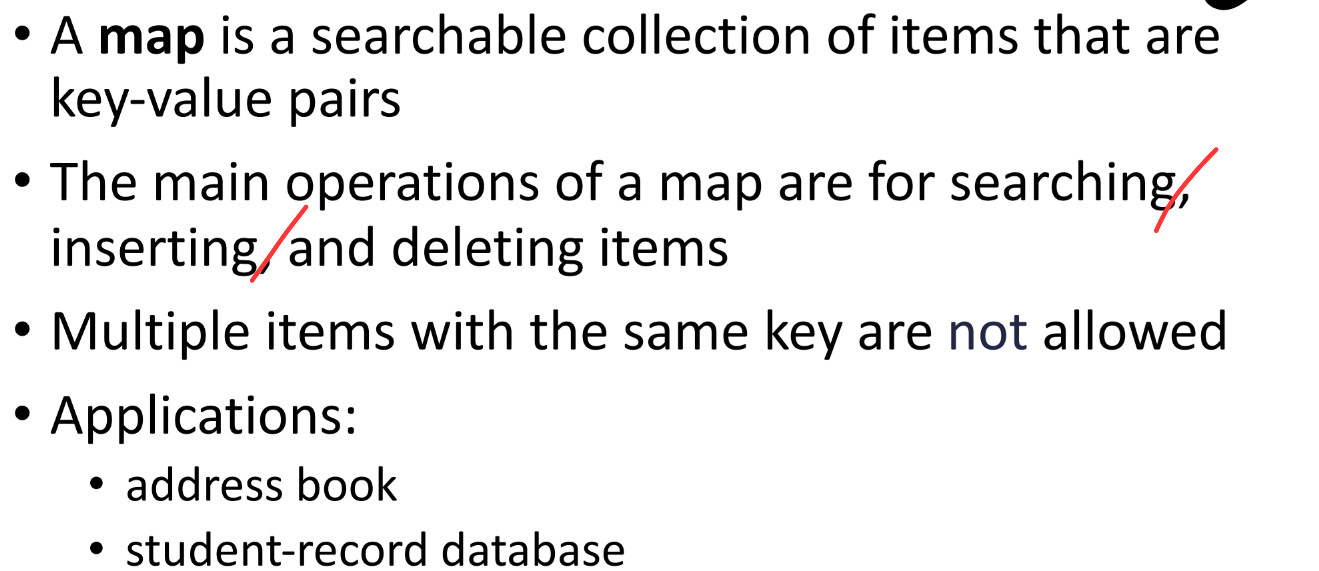

In [1]:
M = {}
print(M)
M['a'] = 1
M['b'] = 2
print(M)
print(M['a'])
print(M['b'])
print(M.get('c', 3))
print(M)
print(M.pop('a'))
print(M)
print(M.pop('c', 3))
print(M)
print(M.keys())
print(M.values())
print(M.items())
print(M.setdefault('a', 1))
print(M)
print(M.setdefault('c', 3))
print(M)
print(M.popitem())

{}
{'a': 1, 'b': 2}
1
2
3
{'a': 1, 'b': 2}
1
{'b': 2}
3
{'b': 2}
dict_keys(['b'])
dict_values([2])
dict_items([('b', 2)])
1
{'b': 2, 'a': 1}
3
{'b': 2, 'a': 1, 'c': 3}
('c', 3)


# Hash
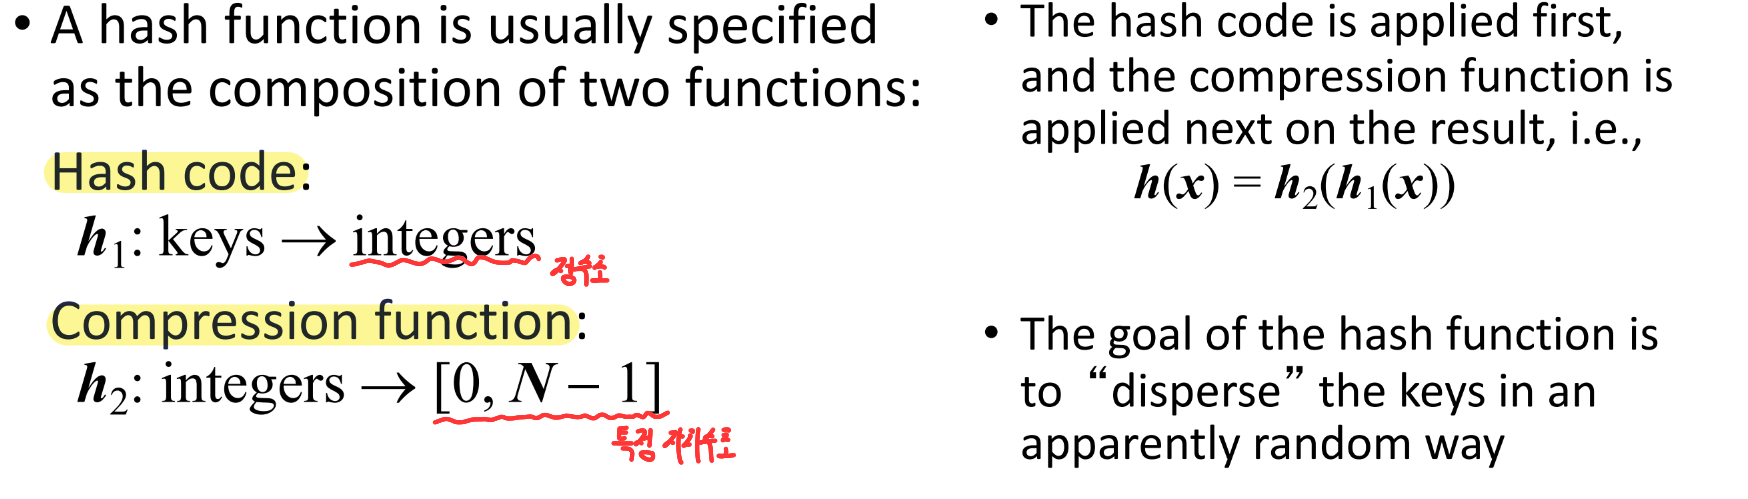

In [ ]:
from Week9_codes.chain_hash_map import ChainHashMap
separate_chaining = ChainHashMap() 
separate_chaining['a'] = 1 # {'a': 1}
separate_chaining['b'] = 2 # {'a': 1, 'b': 2}
separate_chaining['c'] = 3 # {'a': 1, 'b': 2, 'c': 3}
print(separate_chaining)
print(separate_chaining['a']) # 1
print(separate_chaining['b']) # 2
print(separate_chaining['c']) # 3
print(separate_chaining._bucket_delitem(0, 'a')) # 1
print(separate_chaining) # {'b': 2, 'c': 3}
print(separate_chaining._bucket_setitem(0, 'a', 1)) # None
print(separate_chaining) # {'b': 2, 'c': 3, 'a': 1}
print(separate_chaining._bucket_getitem(0, 'a')) # 1

### linear probing
- handles collisions by placing the colliding item in the next available table cell
- each table cell inspected is refered to as a "probe"

In [ ]:
from Week9_codes.probe_hash_map import ProbeHashMap

# h(x) = x % 13
linear_probing = ProbeHashMap()
linear_probing[18] = 'a' # {18: 'a'}
linear_probing[41] = 'b' # {18: 'a', 41: 'b'}
linear_probing[22] = 'c' # {18: 'a', 41: 'b', 22: 'c'}
print(linear_probing) # [none, 41, none, none, 18, none, none, none, 22, none, none, none]
linear_probing[44] = 'd' # {18: 'a', 41: 'b', 22: 'c', 44: 'd'}
print(linear_probing) # [none, 41, none, none, 18, 44, none, none, 22, none, none, none]

In [ ]:
# h(k) = k % 13
# d(k) = 7 - (k % 7)
linear_probing = ProbeHashMap()
linear_probing[18] = 'a' # {18: 'a'}
linear_probing[41] = 'b' # {18: 'a', 41: 'b'}
linear_probing[22] = 'c' # {18: 'a', 41: 'b', 22: 'c'}
print(linear_probing) # [none, 41, none, none, 18, none, none, none, 22, none, none, none]
linear_probing[44] = 'd' # {18: 'a', 41: 'b', 22: 'c', 44: 'd'}
print(linear_probing) # [none, 41, none, none, 18, none, none, none, 22, 44, none, none]

# Sorted Map
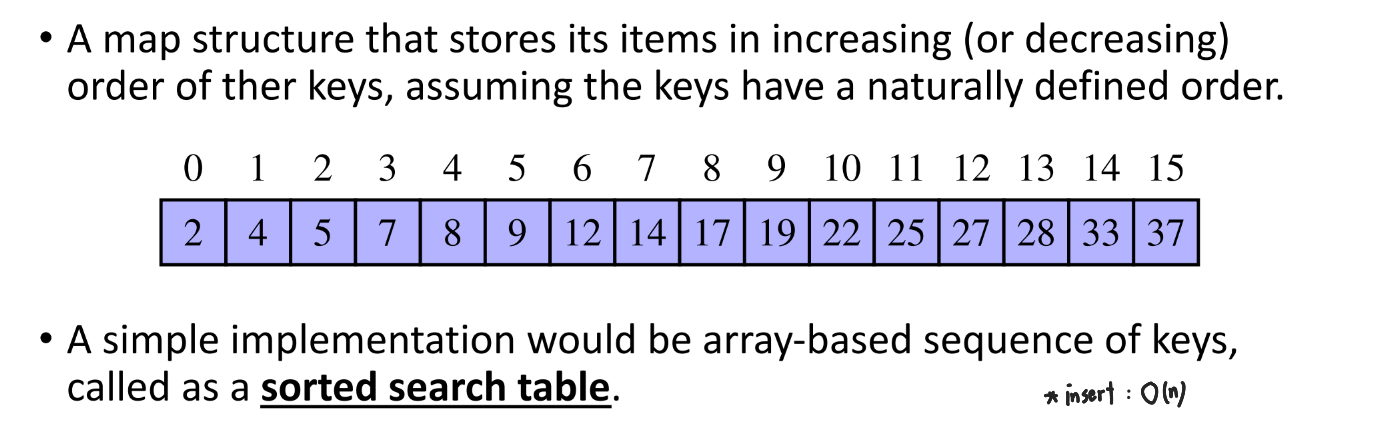

In [1]:
# binary search
from Week9_codes.sorted_table_map import SortedTableMap
sorted_map = SortedTableMap()
sorted_map[18] = 'a' # {18: 'a'}
sorted_map[41] = 'b' # {18: 'a', 41: 'b'}
sorted_map[22] = 'c' # {18: 'a', 22: 'c', 41: 'b'}
sorted_map[44] = 'd' # {18: 'a', 22: 'c', 41: 'b', 44: 'd'}
sorted_map[9] = 'e' # {9: 'e', 18: 'a', 22: 'c', 41: 'b', 44: 'd'}
print(sorted_map.find_min()) # 18

(9, 'e')


In [2]:
# Inexact search
print(sorted_map.find_le(22)) # 22
print(sorted_map.find_ge(22)) # 22
print(sorted_map.find_lt(22)) # 18
print(sorted_map.find_gt(22)) # 41

(22, 'c')
(22, 'c')
(18, 'a')
(41, 'b')


In [6]:
class CostPerformanceDatabase:
    def __init__(self):
        self._table = SortedTableMap()
    
    def best(self, cost):
        return self._table.find_le(cost)
    
    def add(self, cost, performance):
        old = self._table.find_le(cost)
        if old is not None and old[1] >= performance:
            return
        self._table[cost] = performance
        old = self._table.find_gt(cost)
        while old is not None and old[1] <= performance:
            del self._table[old[0]]
            old = self._table.find_gt(cost)

cpd = CostPerformanceDatabase()
cpd.add(100, 200)
cpd.add(150, 300)
cpd.add(200, 500)
cpd.add(210, 320)
cpd.add(230, 350)
cpd.add(250, 400)
cpd.add(300, 600)
cpd.add(350, 700)
cpd.add(400, 800)
cpd.best(290) # 320

(200, 500)

# Skip list
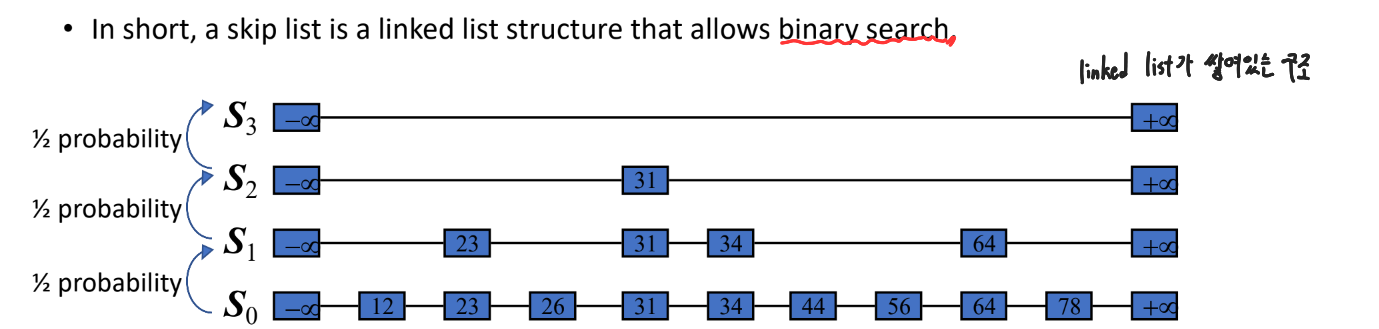